In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from transformers import AutoTokenizer, DistilBertModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [11]:
# create a simple torch model with 1 fully connected layer

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 2)

    def forward(self, x):
        # apply relu on the output of the fully connected layer
        # x = F.relu(self.fc1(x))
        x = self.fc1(x)
        return x

In [12]:
words = [
    "apple", "book", "car", "dog", "cat", "house", "tree", "friend", "time", "money",
    "heart", "sun", "moon", "sky", "water", "fire", "earth", "flower", "city", "music",
    "child", "parent", "school", "job", "love", "smile", "day", "night", "star", "cloud",
    "bird", "fish", "food", "computer", "phone", "internet", "coffee", "tea", "shoes", "hat",
    "dream", "goal", "team", "game", "hope", "fear", "joy", "anger", "peace", "war",
    "friendship", "family", "health", "beauty", "knowledge", "power", "nature", "history", "science",
    "art", "happiness", "sadness", "color", "mind", "body", "soul", "memory", "experience", "idea",
    "faith", "truth", "lie", "problem", "solution", "question", "answer", "light", "darkness", "wind",
    "rain", "snow", "smell", "taste", "touch", "sound", "silence", "joy", "freedom", "future",
    "past", "present", "purpose", "journey", "adventure", "discovery", "challenge", "victory", "defeat"
    "time", "person", "year", "way", "day", "man", "government", "company", "number", "child",
    "part", "place", "case", "group", "problem", "fact", "eye", "friend", "charge", "point",
    "home", "hand", "job", "food", "example", "place", "book", "end", "government", "water",
    "room", "mother", "area", "money", "story", "fact", "month", "lot", "right", "study",
    "face", "word", "business", "question", "school", "reason", "air", "mind", "law", "company",
    "word", "number", "order", "example", "market", "name", "door", "value", "position", "body",
    "problem", "theory", "class", "child", "car", "house", "year", "arm", "lot", "father",
    "word", "team", "result", "school", "name", "line", "place", "end", "government", "oil",
    "line", "end", "fire", "company", "example", "name", "water", "person", "home", "country",
    "industry", "back", "mother", "house", "name", "side", "period", "city", "case", "job",
    "air", "team", "problem", "name", "number", "part", "car", "hand", "body", "example",
    "home", "water", "point", "name", "company", "room", "group", "fact", "eye", "lot",
    "question", "place", "government", "word", "end", "number", "problem", "part", "home",
    "case", "job", "lot", "team", "person", "result", "line", "city", "air", "example",
    "water", "place", "number", "name", "door", "money", "team", "word", "person", "end",
    "position", "body", "fire", "problem", "car", "word", "house", "value", "fact", "theory"
    "breeze", "cascade", "serenity", "quasar", "equinox", "fluke", "havoc", "gadget", "nuance", "oblivion",
    "paradox", "quagmire", "reverie", "saga", "thistle", "vortex", "whimsy", "xenon", "yarn", "zenith",
    "clique", "dynamo", "epoch", "fiasco", "glyph", "halo", "icon", "jargon", "kaleidoscope", "labyrinth",
    "memento", "nirvana", "opulence", "pinnacle", "quintessence", "rendezvous", "sonnet", "tryst", "utopia", "vista",
    "wanderlust", "xylophone", "yearning", "zealot", "albatross", "bivouac", "catalyst", "dystopia", "effigy", "fandango"
    "companion", "toast", "lounge", "combination", "majesty", "nutrient", "bark", "rest", "drainage", "time", "drink",
    "journey", "shipment", "measure", "cutlery", "catch", "flutter", "moo", "commute", "score", "indulgence", "cutting",
    "containment", "communication", "transportation", "slice", "drying", "tote", "nurture", "breakfast", "cut", "brush",
    "competition", "signal", "mobility", "conformity", "comfort", "pause", "input", "hygiene", "click", "health",
    "entertainment", "halt", "crunch", "softness", "control", "loyalty", "formality", "individuality", "gallop",
    "protection", "gathering", "pattern", "productivity", "purr", "decoration", "bite", "accessory", "reflection",
    "grace", "support", "scoop", "tick", "flight", "navigation", "descent", "voyage", "thrill", "hug", "knowledge",
    "shield", "transit", "solitude", "heat", "celebration", "adventure", "song", "elegance", "recreation", "roar",
    "trumpet", "container", "aroma", "childhood", "measurement", "sanitation", "vibration", "growth", "safety", "swing",
    "sharpness", "stride", "graze", "excitement", "acidity", "prong", "munch", "person", "bicycle", "car", "motorcycle",
    "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush", "%", "company", "year", "market", "trading", "Thanksgiving", "Mr.", "U.S.", "New",
    "Corp.", "York", "Containers", "Securities", "Industries", "Materials", "Soviets", "years", "shares", "prices",
    "cents", "funds"
]

most_common_words = []

# remove duplicates
words = list(set(words))
most_common_words = list(set(most_common_words))

print(len(words))
print(len(most_common_words))

assert len(list(set(words + most_common_words))) == len(words) + len(most_common_words)

381
0


In [13]:
non_words = [
    "run", "jump", "eat", "sleep", "think", "happy", "fast", "slow", "beautiful", "smart",
    "quickly", "easily", "always", "never", "under", "over", "beside", "between", "through", "with",
    "and", "but", "or", "because", "although", "well", "yes", "no", "oh", "wow", "ouch",
    "go", "come", "stop", "start", "win", "lose", "hot", "cold", "loud", "soft",
    "bright", "dark", "high", "low", "near", "far", "big", "small", "old", "new",
    "first", "last", "next", "previous", "good", "bad", "happy", "sad", "rich", "poor",
    "early", "late", "hard", "easy", "simple", "complex", "right", "wrong", "true", "false",
    "up", "down", "in", "out", "on", "off", "up", "down", "here", "there",
    "now", "then", "today", "tomorrow", "yesterday", "soon", "later", "before", "after", "while",
    "once", "twice", "thrice", "nevertheless", "however", "suddenly", "finally", "quickly", "slowly", "nowadays",
    "some", "many", "few", "most", "none", "all", "each", "every", "somebody", "nobody",
    "something", "nothing", "somewhere", "nowhere", "anywhere", "everywhere", "this", "that", "these", "those",
    "which", "what", "who", "whom", "whose", "where", "when", "why", "how", "whether",
    "if", "unless", "because", "since", "although", "though", "while", "before", "after", "when",
    "and", "or", "but", "nor", "for", "so", "yet", "either", "neither", "however"
    "is", "are", "was", "were", "am", "be", "being", "been", "has", "have",
    "had", "do", "does", "did", "doing", "will", "would", "shall", "should", "can",
    "could", "may", "might", "must", "ought", "ain't", "isn't", "aren't", "wasn't", "weren't",
    "hasn't", "haven't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't",
    "can't", "cannot", "couldn't", "mayn't", "mightn't", "mustn't", "oughtn't", "it's", "that's", "who's",
    "what's", "there's", "here's", "when's", "where's", "why's", "how's", "not", "no", "never",
    "none", "nope", "nothing", "nowhere", "nobody", "notwithstanding", "however", "although", "though", "but",
    "yet", "either", "neither", "nor", "or", "and", "also", "more", "less", "most",
    "least", "very", "too", "so", "such", "just", "only", "quite", "almost", "even",
    "well", "better", "best", "worse", "worst", "moreover", "furthermore", "nevertheless", "nonetheless", "however",
    "therefore", "consequently", "thus", "hence", "since", "because", "although", "though", "if", "unless",
    "until", "while", "when", "where", "after", "before", "because", "since", "if", "unless",
    "until", "while", "when", "where", "after", "before", "if", "unless", "while", "when",
    "where", "after", "before", "though", "although", "because", "since", "while", "when", "where",
    "if", "unless", "until", "though", "although", "because", "since", "so", "that", "if",
    "unless", "until", "while", "when", "where", "after", "before", "if", "unless", "until",
    "while", "when", "where", "after", "before", "but", "and", "or", "as", "if",
    "unless", "until", "while", "when", "where", "after", "before", "but", "and", "or",
    "as", "because", "since", "so", "that", "if", "unless", "until", "though", "although",
    "because", "since", "while", "when", "where", "if", "unless", "until", "though", "although",
    "because", "since", "so", "that", "if", "unless", "until", "though", "although", "because",
    "since", "while", "when", "where", "after", "before", "if", "unless", "until", "though",
    "although", "because", "since", "so", "that", "if", "unless", "until", "while", "when",
    "where", "after", "before", "though", "although", "because", "since", "so", "that", "if",
    "unless", "until", "while", "when", "where", "after", "before", "but", "and", "or",
    "as", "because", "since", "so", "that", "if", "unless", "until", "though", "although",
    "because", "since", "while", "when", "where", "if", "unless", "until", "though", "although",
    "because", "since", "so", "that", "if", "unless", "until", "though", "although", "because"
    ",", "Wa", "--", ";", ":", "...", "-", ".", "?", "!", "'", "#", "``", "`", "$", "US$", "C$", "and", "or",
    "But", "but", "million", "billion", "one", "two", "10", "the", "a", "The", "an", "this", "there", "There",
    "Perestroika", "besuboru", "de", "etc.", "of", "for", "on", "new", "other", "last", "many", "higher", "lower",
    "largest", "least", "latest", "best", "1", "2", "3", "4", "5", "will", "would", "could", "can", "may", "all",
    "such", "half", "Such", "All", "Word", "it", "he", "they", "I", "It", "its", "their", "his", "her", "our",
    "n't", "also", "not", "only", "even", "more", "earlier", "less", "better", "longer", "most", "Most", "up",
    "out", "off", "in", "down", "&", "to", "To", "TO", "OK", "Oh", "no", "watch", "haul", "extinguish", "hold",
    "chill", "eat", "surf", "devour", "drive", "sail", "descend", "glide", "throw", "carry", "dine", "call",
    "soar", "walk", "sip", "rinse", "uncork", "skate", "type", "read", "bake", "poke", "consume", "fly", "fasten",
    "hit", "flush", "peel", "dry", "crave", "ride", "sit", "indulge", "chop", "be", "make", "buy", "take", "said",
    "was", "were", "had", "did", "cooling", "heating", "including", "according", "being", "growing", "trying",
    "been", "expected", "made", "compared", "based", "are", "have", "say", "do", "re", "is", "has", "says", "s",
    "does", "which", "that", "That", "THAT", "who", "what", "What", "whom", "Who", "whose", "when", "where", "how",
    "When", "why"
]

# remove duplicates
non_words = list(set(non_words))

print(len(non_words))


350


In [14]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [15]:
# create a function that takes a list of words and returns a list of embeddings
def get_embeddings(words):
    embeddings = []

    for word in words:
        input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
        outputs = model(input_ids)
        last_hidden_states = outputs[0]
        embeddings.append(torch.mean(last_hidden_states[0][1:-1], dim=0).tolist())
    
    assert len(embeddings) == len(words)
    return embeddings

embeddings = get_embeddings(words)
most_common_embeddings = get_embeddings(most_common_words)
non_embeddings = get_embeddings(non_words)

In [16]:
# slice the lists into training and test sets
words_train = words[:int(len(words)*0.8)]
words_test = words[int(len(words)*0.8):]
embeddings_train = embeddings[:int(len(embeddings)*0.8)]
embeddings_test = embeddings[int(len(embeddings)*0.8):]

most_common_words_train = most_common_words[:int(len(most_common_words)*0.8)]
most_common_words_test = most_common_words[int(len(most_common_words)*0.8):]
most_common_embeddings_train = most_common_embeddings[:int(len(most_common_embeddings)*0.8)]
most_common_embeddings_test = most_common_embeddings[int(len(most_common_embeddings)*0.8):]

non_words_train = non_words[:int(len(non_words)*0.8)]
non_words_test = non_words[int(len(non_words)*0.8):]
non_embeddings_train = non_embeddings[:int(len(non_embeddings)*0.8)]
non_embeddings_test = non_embeddings[int(len(non_embeddings)*0.8):]

# create a dataframe with the training sets
train_embeddings = embeddings_train + most_common_embeddings_train + non_embeddings_train
df_train = pd.DataFrame(train_embeddings)
# convert the column names to strings
df_train.columns = [str(i) for i in df_train.columns]

df_train['label'] = [1]*len(words_train) + [1]*len(most_common_words_train) + [0]*len(non_words_train)
df_train['word'] = words_train + most_common_words_train + non_words_train

# create a dataframe with the test sets
test_embeddings = embeddings_test + most_common_embeddings_test + non_embeddings_test
df_test = pd.DataFrame(test_embeddings)
# convert the column names to strings
df_test.columns = [str(i) for i in df_test.columns]

df_test['label'] = [1]*len(words_test) + [1]*len(most_common_words_test) + [0]*len(non_words_test)
df_test['word'] = words_test + most_common_words_test + non_words_test

# df_train = pd.DataFrame({
#     'word': words_train + most_common_words_train + non_words_train,
#     'embedding': embeddings_train + most_common_embeddings_train + non_embeddings_train,
#     'label': [1]*len(words_train) + [1]*len(most_common_words_train) + [0]*len(non_words_train)
# })

# df_test = pd.DataFrame({
#     'word': words_test + most_common_words_test + non_words_test,
#     'embedding': embeddings_test + most_common_embeddings_test + non_embeddings_test,
#     'label': [1]*len(words_test) + [1]*len(most_common_words_test) + [0]*len(non_words_test)
# })

# shuffle the dataframes
# df_train = df_train.sample(frac=1).reset_index(drop=True)
# df_test = df_test.sample(frac=1).reset_index(drop=True)

print(df_train[:5])
print(df_train[-5:])
print(df_test[:5])
print(df_test[-5:])

          0         1         2         3         4         5         6  \
0 -0.374845 -0.251046 -0.046378 -0.120344 -0.020453  0.712524 -0.144484   
1  0.261447  0.365437 -0.208051 -0.554422  0.199989  0.143858  0.485012   
2 -0.331599 -0.376078  0.308602 -0.473974 -0.233084  0.613104 -0.108882   
3  0.193025  0.161425 -0.223975 -0.111447  0.172411  0.328737  0.340810   
4  0.223298 -0.060303 -0.277992 -0.209905  0.598620  0.201425 -0.036685   

          7         8         9  ...       760       761       762       763  \
0  0.426953 -0.022439 -0.457561  ...  0.600050 -0.077704 -0.002019 -0.153695   
1  0.187004 -0.419440 -0.629365  ...  0.420119 -0.217428 -0.018963 -0.023821   
2  0.348131 -0.161160 -0.042700  ...  0.203100 -0.120749 -0.077259  0.015973   
3  0.159895  0.332110 -0.769091  ... -0.150431 -0.086227  0.177500  0.135876   
4 -0.058138 -0.166255 -0.743760  ...  0.367954 -0.164253  0.208860 -0.171945   

        764       765       766       767  label    word  
0  0.1484

In [17]:
class CustomDataset(Dataset):
    def __init__(self, tokenized_texts, labels):
        self.tokenized_texts = torch.tensor(tokenized_texts)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.tokenized_texts[idx], self.labels[idx]

In [18]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('mps')
device = torch.device('cpu')

In [19]:
def create_dataloaders(df_train, df_test):
    train_dataset = CustomDataset(df_train['embedding'], df_train['label'])
    test_dataset = CustomDataset(df_test['embedding'], df_test['label'])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

    return train_loader, test_loader

In [20]:
def train_model(train_loader):

    # train the model
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.003)

    num_epochs = 100
    net.to(device)

    best_combined_loss = float('inf')

    for epoch in range(num_epochs):
        net.train()
        combined_loss = 0
        for batch in train_loader:
            # get data to GPU if possible
            data = batch[0].to(device=device, dtype=torch.float32)
            data = data.unsqueeze(1)
            targets = batch[1].to(device=device)
            # print(data.shape)
            
            # forward
            scores = net(data)
            loss = criterion(scores, targets)
            combined_loss += loss.item()

            # backward
            optimizer.zero_grad()
            loss.backward()

            # gradient descent or adam step
            optimizer.step()

        if combined_loss < best_combined_loss:
            best_combined_loss = combined_loss
        
        # print initial loss
        # if epoch == 0:
        #     print(f'Initial loss: {combined_loss/len(train_loader)}')
            
        # print average loss per epoch every 10 epochs
        # if (epoch + 1) % 10 == 0:
        #     print(f'Epoch {epoch + 1}, loss={combined_loss/len(train_loader)}')
        #     # print(combined_loss / len(train_loader))

    return net, best_combined_loss



In [21]:
# evaluate the net using sklearn metrics
def evaluate_net(loader, net):
    y_true = []
    y_pred = []

    net.eval()
    with torch.no_grad():
        for batch in loader:
            # get data to GPU if possible
            data = batch[0].to(device=device, dtype=torch.float32)
            data = data.unsqueeze(1)
            targets = batch[1].to(device=device)

            # forward
            scores = net(data)
            _, predictions = scores.max(1)
            y_true.extend(targets.tolist())
            y_pred.extend(predictions.tolist())

    accuracy = accuracy_score(y_true, y_pred)
    # precision = precision_score(y_true, y_pred)
    # recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, f1
    # return accuracy, precision, recall, f1

# def check_accuracy(loader, net):
#     num_correct = 0
#     num_samples = 0
#     net.eval()

#     with torch.no_grad():
#         for batch in loader:
#             # get data to GPU if possible
#             data = batch[0].to(device=device, dtype=torch.float32)
#             data = data.unsqueeze(1)
#             targets = batch[1].to(device=device)

#             # forward
#             scores = net(data)
#             _, predictions = scores.max(1)
#             num_correct += (predictions == targets).sum()
#             num_samples += predictions.size(0)
    
#     return num_correct / num_samples

In [22]:
# go through all the slices of the dataframe and train and evaluate the model

all_test_accs = []
all_test_f1s = []
all_combined_losses = []

for slice in range(768):
    print(f'Slice: {slice}')
    # slice = 0

    # create one column slice of the dataframe
    df_train_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(slice)],
        'label': df_train['label']
    })

    df_test_slice = pd.DataFrame({
        # 'word': df_test['word'],
        'embedding': df_test[str(slice)],
        'label': df_test['label']
    })

    # print(df_train_slice[:5])
    # print(df_train_slice[-5:])

    train_slice_loader, test_slice_loader = create_dataloaders(df_train_slice, df_test_slice)

    # take the best of 3 runs
    best_test_acc = 0
    best_test_f1 = 0

    for i in range(10):
        net, best_combined_loss = train_model(train_slice_loader)

        train_acc, train_f1 = evaluate_net(train_slice_loader, net)
        test_acc, test_f1 = evaluate_net(test_slice_loader, net)

        if test_acc > best_test_acc and test_f1 > best_test_f1:
            best_test_acc = test_acc
            best_test_f1 = test_f1
            # best_train_acc = train_acc
            # best_net = net
    
    all_test_accs.append(best_test_acc)
    all_test_f1s.append(best_test_f1)
    all_combined_losses.append(best_combined_loss)

    # print(f'Accuracy on training set: {check_accuracy(train_loader, net)*100:.2f}%')
    # print(f'Accuracy on test set: {check_accuracy(test_loader, net)*100:.2f}%')

    print(f'Slice {slice} best combined loss: {best_combined_loss}')
    print(f'Slice {slice} best test f1: {best_test_f1:.4f}')
    print(f'Slice {slice} best test accuracy: {best_test_acc*100:.2f}% \n')

print(len(all_test_accs))
# print(len(all_test_f1s))

Slice: 0
Slice 0 best combined loss: 24.8671857714653
Slice 0 best test f1: 0.6667
Slice 0 best test accuracy: 65.31% 

Slice: 1
Slice 1 best combined loss: 24.007129907608032
Slice 1 best test f1: 0.7044
Slice 1 best test accuracy: 68.03% 

Slice: 2
Slice 2 best combined loss: 24.384097695350647
Slice 2 best test f1: 0.6901
Slice 2 best test accuracy: 63.95% 

Slice: 3
Slice 3 best combined loss: 24.524148166179657
Slice 3 best test f1: 0.6386
Slice 3 best test accuracy: 59.18% 

Slice: 4
Slice 4 best combined loss: 23.788191378116608
Slice 4 best test f1: 0.7237
Slice 4 best test accuracy: 71.43% 

Slice: 5
Slice 5 best combined loss: 25.25294041633606
Slice 5 best test f1: 0.6400
Slice 5 best test accuracy: 57.14% 

Slice: 6
Slice 6 best combined loss: 25.430784165859222
Slice 6 best test f1: 0.6667
Slice 6 best test accuracy: 57.82% 

Slice: 7
Slice 7 best combined loss: 24.669884860515594
Slice 7 best test f1: 0.6875
Slice 7 best test accuracy: 65.99% 

Slice: 8
Slice 8 best combi

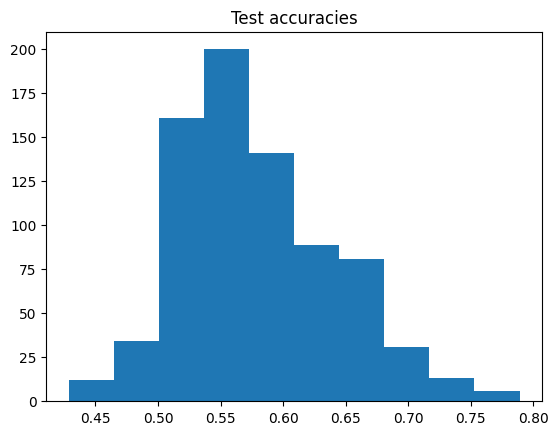

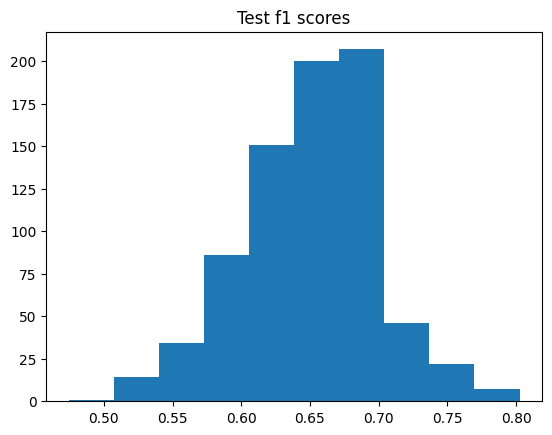

In [30]:
# plot histograms of the test accuracies and f1 scores
plt.hist(all_test_accs)
plt.title('Test accuracies')
plt.show()

plt.hist(all_test_f1s)
plt.title('Test f1 scores')
plt.show()

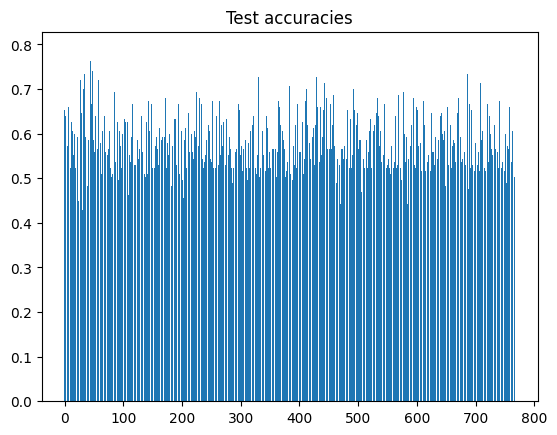

In [32]:
# plot bar chart of the accuracies
plt.bar(range(768), all_test_accs)
plt.title('Test accuracies')
plt.show()

In [23]:
print(all_test_accs[:10]) 

[0.6530612244897959, 0.6802721088435374, 0.6394557823129252, 0.5918367346938775, 0.7142857142857143, 0.5714285714285714, 0.5782312925170068, 0.6598639455782312, 0.5510204081632653, 0.5170068027210885]


In [24]:
# convert list of tensors into list of floats
all_test_accs_val = [acc.item() for acc in all_test_accs]
all_test_f1s_val = [f1.item() for f1 in all_test_f1s]

print(all_test_accs_val[:10])
print(all_test_f1s_val[:10])

[0.6530612244897959, 0.6802721088435374, 0.6394557823129252, 0.5918367346938775, 0.7142857142857143, 0.5714285714285714, 0.5782312925170068, 0.6598639455782312, 0.5510204081632653, 0.5170068027210885]
[0.6666666666666666, 0.7044025157232705, 0.6900584795321637, 0.6385542168674699, 0.7236842105263158, 0.64, 0.6666666666666666, 0.6875000000000001, 0.6024096385542169, 0.6570048309178743]


In [25]:
all_test_accs_val = np.array(all_test_accs_val)
all_test_f1s_val = np.array(all_test_f1s_val)
all_combined_losses = np.array(all_combined_losses)

In [33]:
# find the indices of the top 10 slices
top_10_indices = np.argsort(all_test_accs_val)[-10:]
top_10_indices_f1 = np.argsort(all_test_f1s_val)[-10:]
print(top_10_indices)
print(top_10_indices_f1)
print(all_test_accs_val[top_10_indices])
print(all_test_f1s_val[top_10_indices])
print(all_combined_losses[top_10_indices])

[686  34  48 529 522 321 614  44 745 215]
[ 27  48 686 529 321 522 614  44 215 745]
[0.73469388 0.73469388 0.7414966  0.7414966  0.75510204 0.75510204
 0.75510204 0.76190476 0.78911565 0.78911565]
[0.76646707 0.75159236 0.7625     0.77380952 0.77777778 0.775
 0.7804878  0.7826087  0.80254777 0.79194631]
[22.51872504 23.89981192 22.44156882 21.17535567 19.92017455 22.31808874
 21.29881737 17.50767986 18.70270951 20.97469044]


In [35]:
# create a dataframe with accuracy and loss
df_acc_loss = pd.DataFrame({
    'accuracy': all_test_accs_val,
    'f1': all_test_f1s,
    'loss': all_combined_losses
})

print(df_acc_loss[:10])

# save the dataframe to a csv file
df_acc_loss.to_csv('llm-outputs/nouns_xl_bruteforce_acc_loss.csv', index=False)

   accuracy        f1       loss
0  0.653061  0.666667  24.867186
1  0.680272  0.704403  24.007130
2  0.639456  0.690058  24.384098
3  0.591837  0.638554  24.524148
4  0.714286  0.723684  23.788191
5  0.571429  0.640000  25.252940
6  0.578231  0.666667  25.430784
7  0.659864  0.687500  24.669885
8  0.551020  0.602410  24.671768
9  0.517007  0.657005  25.542035


## Analysis

In [36]:
# for each of the top 10 slices,
# average the embeddings of the pro words and the non words

pro_emb_avg = []
non_emb_avg = []

for i in top_10_indices:
    df_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(i)],
        'label': df_train['label']
    })

    df_slice_pro = df_slice[df_slice['label'] == 1]
    df_slice_non = df_slice[df_slice['label'] == 0]

    pro_emb_avg.append(np.mean(df_slice_pro['embedding']))
    non_emb_avg.append(np.mean(df_slice_non['embedding']))

# create a dataframe with the average embeddings
df_top10_avg = pd.DataFrame({
    'index': top_10_indices,
    'pro': pro_emb_avg,
    'non': non_emb_avg,
    'diff': abs(np.array(pro_emb_avg) - np.array(non_emb_avg)),
    'acc': all_test_accs_val[top_10_indices],
    'f1': all_test_f1s_val[top_10_indices],
    'loss': all_combined_losses[top_10_indices]
})

print(df_top10_avg)

# save the dataframe to a csv file
df_top10_avg.to_csv('llm-outputs/nouns_xl_bruteforce_top10_metrics.csv', index=False)

   index       pro       non      diff       acc        f1       loss
0    686  0.023464 -0.159688  0.183153  0.734694  0.766467  22.518725
1     34 -0.342656 -0.540059  0.197403  0.734694  0.751592  23.899812
2     48 -0.005607 -0.282237  0.276631  0.741497  0.762500  22.441569
3    529 -0.195739 -0.385771  0.190033  0.741497  0.773810  21.175356
4    522 -0.154906 -0.492161  0.337255  0.755102  0.777778  19.920175
5    321  0.277829  0.467063  0.189234  0.755102  0.775000  22.318089
6    614  0.050826  0.203034  0.152208  0.755102  0.780488  21.298817
7     44  0.206909 -0.147362  0.354271  0.761905  0.782609  17.507680
8    745  0.126698 -0.205403  0.332101  0.789116  0.802548  18.702710
9    215 -0.107674 -0.287794  0.180120  0.789116  0.791946  20.974690


In [43]:
def plot_axis_hist(slice):
    df_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(slice)],
        'label': df_train['label']
    })

    df_slice_pro = df_slice[df_slice['label'] == 1]
    df_slice_non = df_slice[df_slice['label'] == 0]

    # draw a histogram of the embeddings, with the pro words in red and the non-pro words in blue
    plt.hist(df_slice_pro['embedding'], bins=30, color='red', alpha=0.5)
    plt.hist(df_slice_non['embedding'], bins=30, color='blue', alpha=0.5)
    plt.title(f"Axis {slice} histogram")
    plt.show()

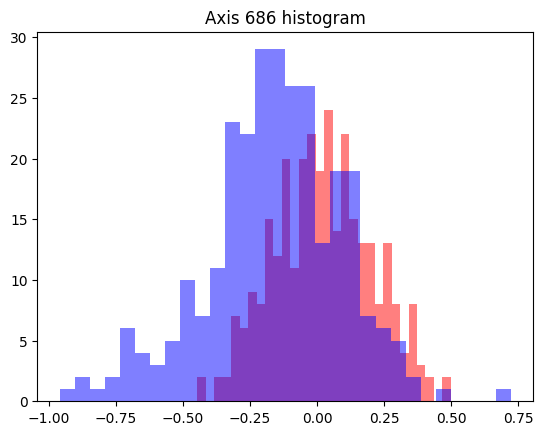

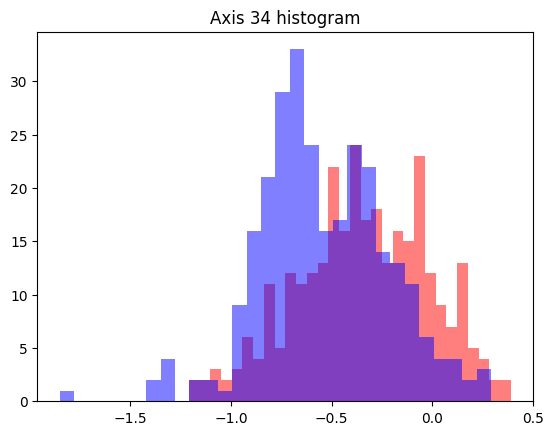

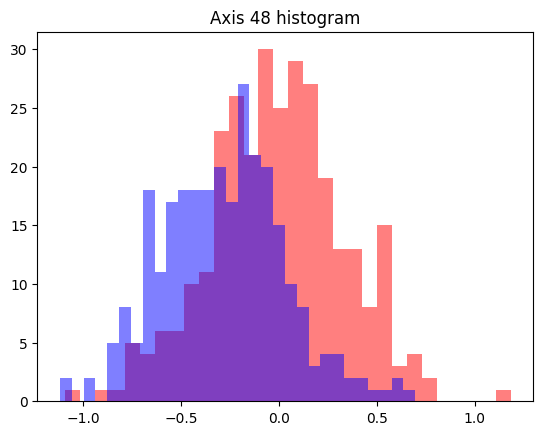

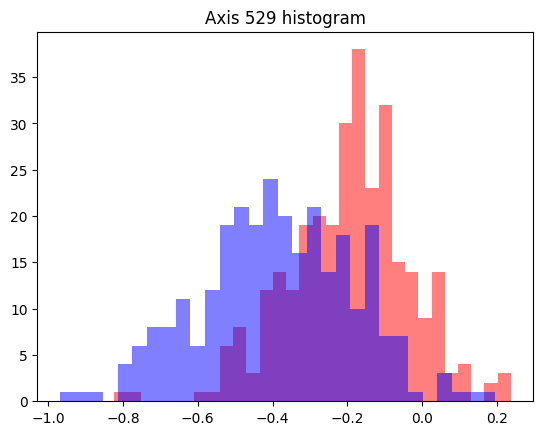

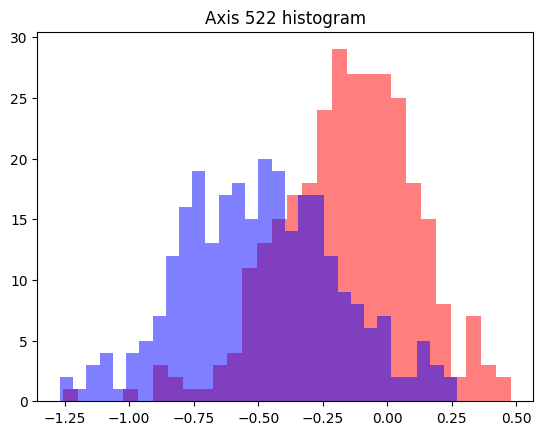

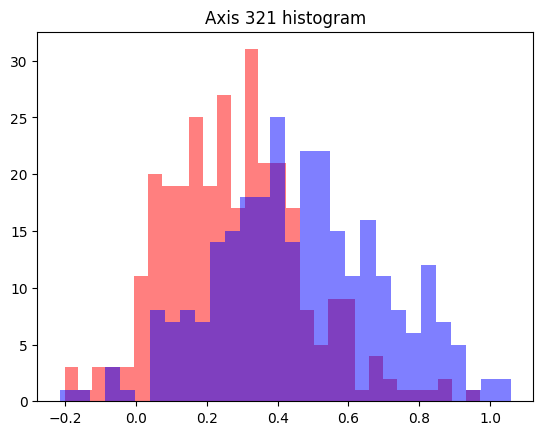

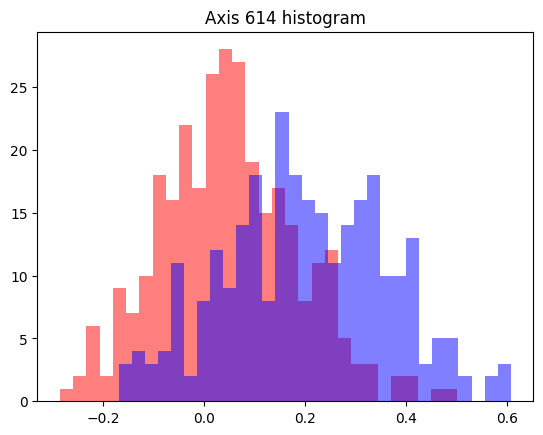

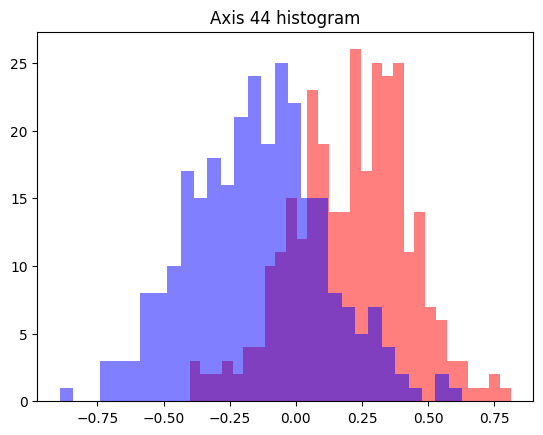

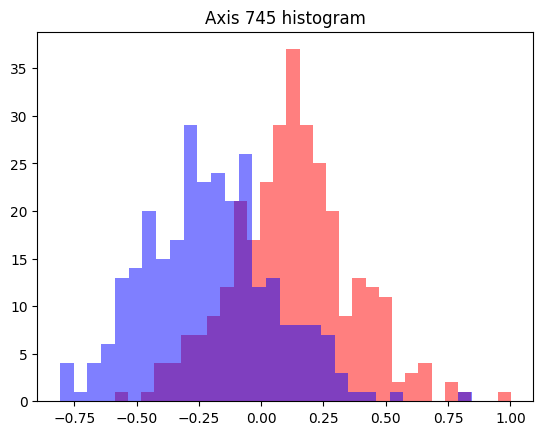

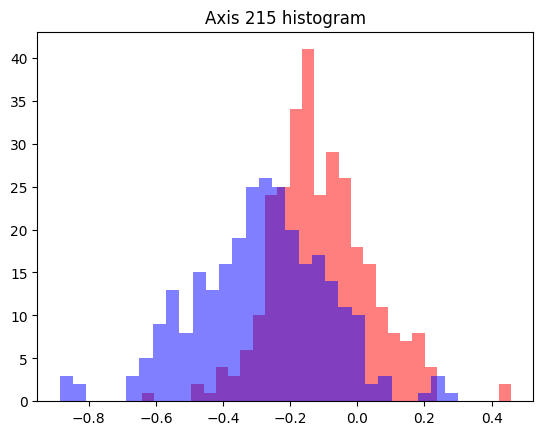

In [44]:
for i in top_10_indices:
    plot_axis_hist(i)

In [48]:
# create a dataframe with the top 10 slices
df_top10 = pd.DataFrame(df_train[str(i)] for i in top_10_indices)
df_top10 = df_top10.T
df_top10.columns = [str(i) for i in df_top10.columns]
df_top10['label'] = df_train['label']
df_top10['word'] = df_train['word']

print(df_top10[:10])

# save the dataframe to a csv file
df_top10.to_csv('llm-outputs/nouns_xl_bruteforce_top10_embs.csv', index=False)

        686        34        48       529       522       321       614  \
0 -0.151752 -0.508748 -0.062794 -0.280756 -0.429892  0.208205  0.220784   
1 -0.162016 -0.913032  0.352588 -0.536503 -0.202539  0.008597  0.032351   
2  0.090103 -0.475712  0.243622 -0.136099 -0.080676  0.044642 -0.011919   
3 -0.145662 -0.379210 -0.058488 -0.071198 -0.538185  0.118923  0.038276   
4 -0.103138 -0.766173  0.412607 -0.212625  0.348283  0.506507  0.072227   
5 -0.029768  0.118873  0.005900  0.065004  0.077368  0.413329 -0.069609   
6  0.259126 -0.526566  0.236324 -0.503119 -0.436275  0.368016  0.413931   
7 -0.257084 -0.342787 -0.174513 -0.320644 -0.429034 -0.075554  0.025968   
8  0.223989 -0.075304 -0.114202 -0.338261 -0.354848  0.396354 -0.134553   
9  0.403347 -0.565080 -0.737566  0.217373 -0.286796  0.208764  0.240053   

         44       745       215  label      word  
0  0.102210 -0.142448 -0.036598      1    person  
1  0.129483  0.020498 -0.061561      1      bear  
2 -0.056978 -0.384304